# The Sparks Foundation
# Data science & Business Analytics Intern(July-21)
# Intern_Name: Ravi Kumar Panchal
# Task-1: Prediction using Supervised ML
# Predict the percentage of an student based on the no.of study hours

In [21]:
# Importing all libraries required in this notebook
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt  
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [22]:
# Reading data from remote link
ds = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

Data imported successfully


In [23]:
ds

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [24]:
# cmd to check the missing values
ds.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [25]:
# cmd to generate descriptive statistics
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visusalization

In [26]:
x = ds['Hours']
y = ds['Scores']

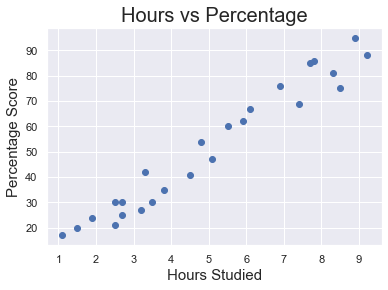

In [27]:
# Plotting the distribution of scores
plt.scatter(x, y)  
plt.title('Hours vs Percentage', fontsize=20)  
plt.xlabel('Hours Studied', fontsize=15)  
plt.ylabel('Percentage Score', fontsize=15)  
plt.show()

# Linear Regression Model

In [28]:
X = ds.iloc[:, :-1].values  
y = ds.iloc[:, 1].values  

In [29]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [30]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Model is successfully trained")

Model is successfully trained


In [11]:
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           9.13e-17
Time:                        22:44:18   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

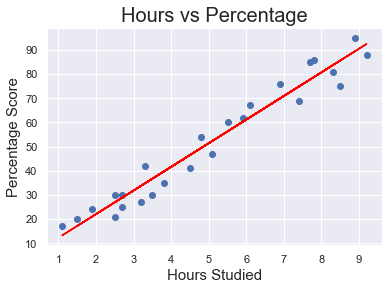

In [31]:
# Plotting the regression line
plt.scatter(X, y)
line = 9.7758*X+2.4837 # regressor.coef_=9.7785, regressor.intercept_ = 2.4837
plt.plot(X, line, c = 'red', label = 'regression line');
plt.title('Hours vs Percentage', fontsize=20)  
plt.xlabel('Hours Studied', fontsize=15)  
plt.ylabel('Percentage Score', fontsize=15) 
plt.show()

In [32]:
#Marking Prediction
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]]


In [33]:
# Comparing Actual vs Predicted
ds_cmp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
ds_cmp

,Actual,Predicted
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


# Evaluate the Model

In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) # MAE: Mean Absolute Error

MAE: 4.894510863410611


# Predicted %

In [35]:
hours=float(input("Enter the number of hrs: "))
percentage = regressor.predict([[hours]])
print("Predicted % :", percentage)

Enter the number of hrs: 9.25
Predicted % : [92.65537185]
